In [1]:
# loading a dataset from a CSV file ('heart.csv') into a pandas DataFrame 
#and then displaying the first few rows of that DataFrame to provide a preview of the data.
import pandas as pd

dataset = pd.read_csv('heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# size of dataset
dataset.shape

(918, 12)

In [4]:
#checking if there's missing data
dataset.isna().sum()
#dataset do not have missing data, which is good.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
#counting the occurrences of each unique value
dataset['HeartDisease'].value_counts()
#there are two classes well balanced

1    508
0    410
Name: HeartDisease, dtype: int64

In [6]:
#Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style = 'whitegrid', palette = 'muted')


Text(0.5, 0.98, 'Ages distribution related to Heart Disease')

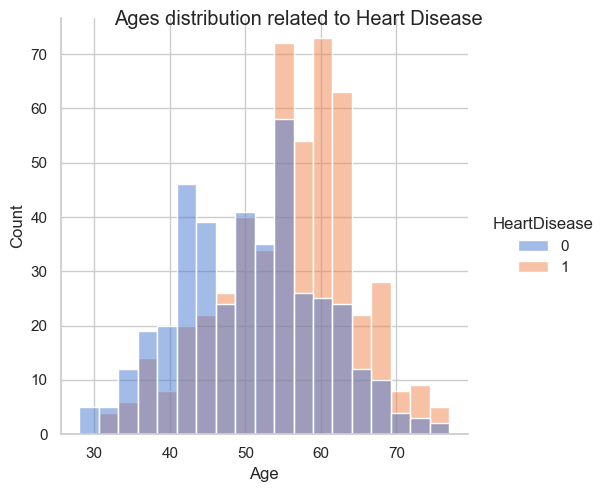

In [8]:
#The histogram shows a strong relationship between age and heart disease
#More frequent in older individuals.
ax = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = dataset
)
ax.fig.suptitle('Ages distribution related to Heart Disease')

Text(0.5, 1.0, 'Age related to Heart Disease')

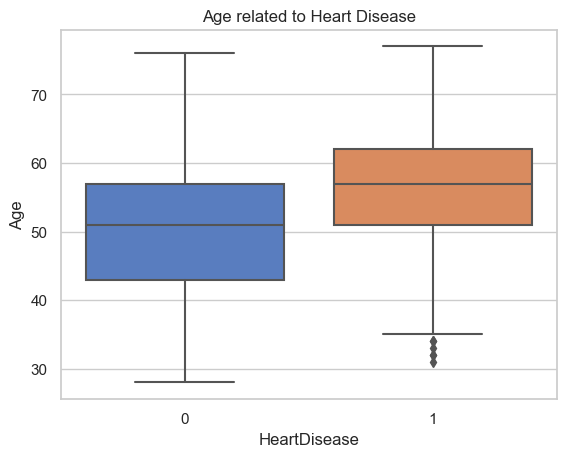

In [9]:
#relationship is more visible in boxplot
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Age'
)
ax.set_title('Age related to Heart Disease')

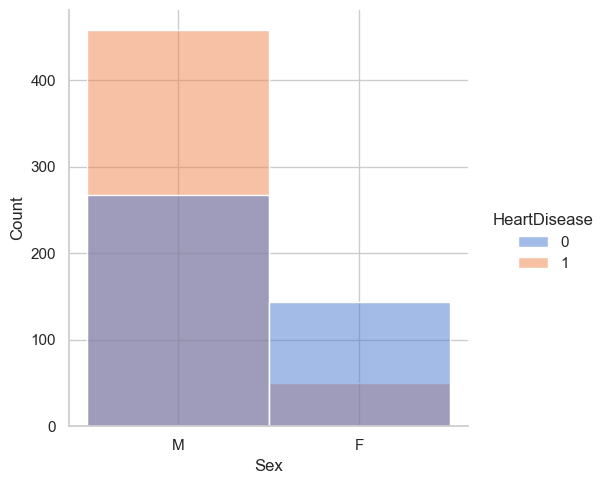

In [10]:
#difference of female and male heart disease 
ax = sns.displot(
    data = dataset,
    x = 'Sex',
    hue = 'HeartDisease',
)

In [11]:
#Data indicates that males are more susceptible to heart disease than females.
#Great difference between the total of males and females on dataset.
sex_totals = dataset['Sex'].value_counts()
heart_disease_totals = dataset.query('HeartDisease == 1')['Sex'].value_counts()
print('Heart disease rate on males: %.2f' % ((heart_disease_totals['M'] / sex_totals['M']) * 100))
print('Heart disease rate on females: %.2f' % ((heart_disease_totals['F'] / sex_totals['F']) * 100))

Heart disease rate on males: 63.17
Heart disease rate on females: 25.91


Text(0.5, 1.0, 'Cholesterol related to Heart Disease')

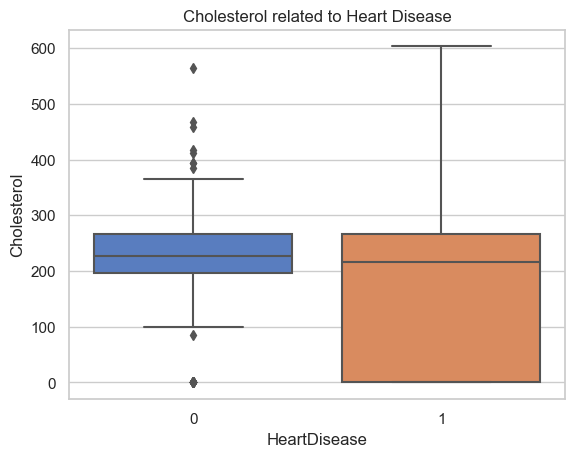

In [12]:
#Cholessterol related to Heart Disease
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Cholesterol'
)
ax.set_title('Cholesterol related to Heart Disease')

Text(0.5, 0.98, 'Chest Pain distribution related to Heart Disease')

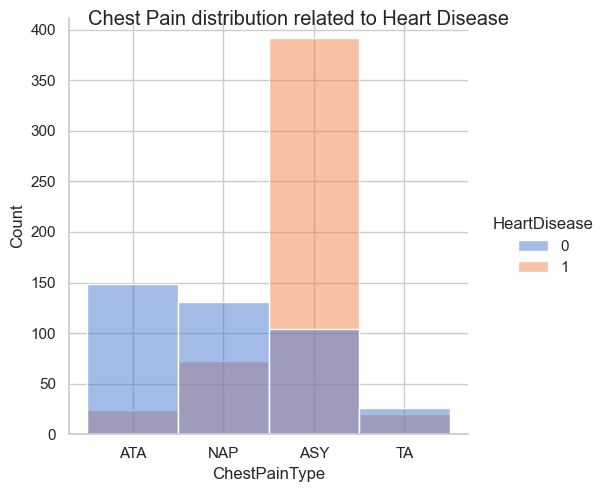

In [13]:
#The most frequent chest pain in heart disease seems to be asymptomatic(ASY)
ax = sns.displot(
    data = dataset,
    x = 'ChestPainType',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Chest Pain distribution related to Heart Disease')

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

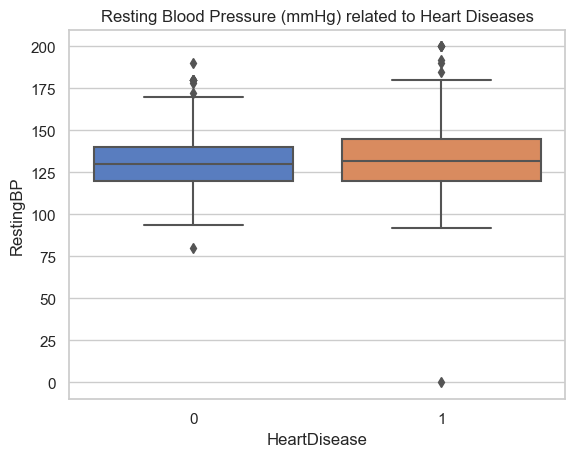

In [14]:
#There is a outlier with blood pressure equal 0 thatis problably a missing data
#outliier missing!
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

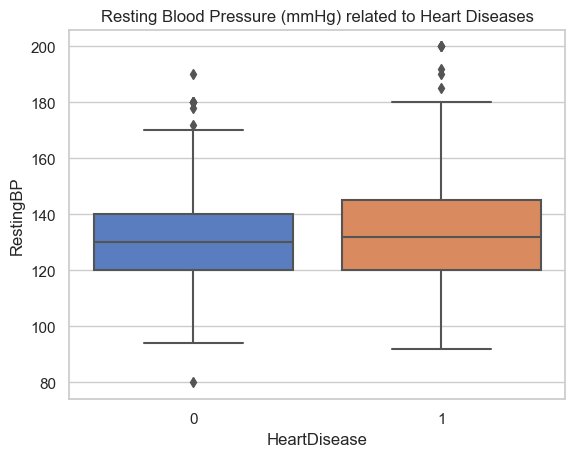

In [15]:
#we can remove it by adding this
#fixing the outlier
ax = sns.boxplot(
    data = dataset.query('RestingBP > 0'),
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

Text(0.5, 1.0, 'Maximun Heart Rate related to Heart Diseases')

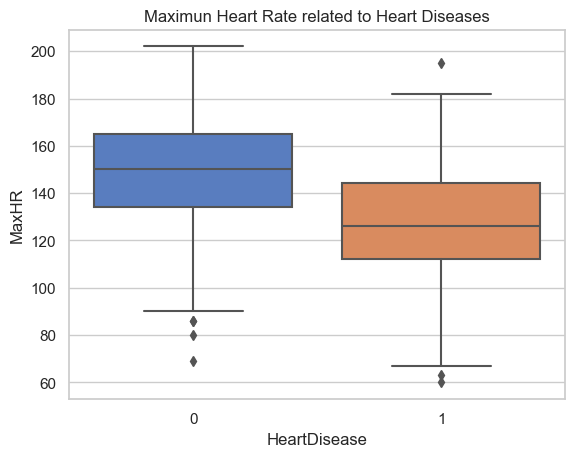

In [16]:
#Maximun Heart Rate realted to heart disease
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'MaxHR'
)
ax.set_title('Maximun Heart Rate related to Heart Diseases')

Text(0.5, 0.98, 'Fasting Blood Sugar (> 120 mg/dl)')

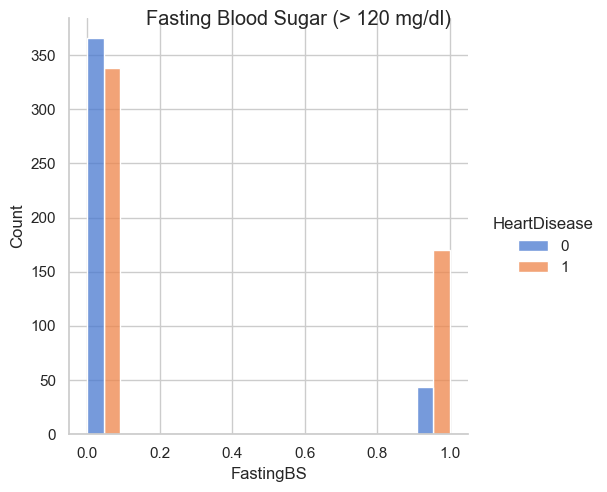

In [17]:
#Fasting Blood Sugar
ax = sns.displot(
    data = dataset,
    x = 'FastingBS',
    hue = 'HeartDisease',
    multiple = 'dodge'
)
ax.fig.suptitle('Fasting Blood Sugar (> 120 mg/dl)')

#fastin blood sugar over 120mg/dl seems to be more frequent on patients with heart disease.

Text(0.5, 0.98, 'Resting Eletrocardiogram Result related to Heart Diseases')

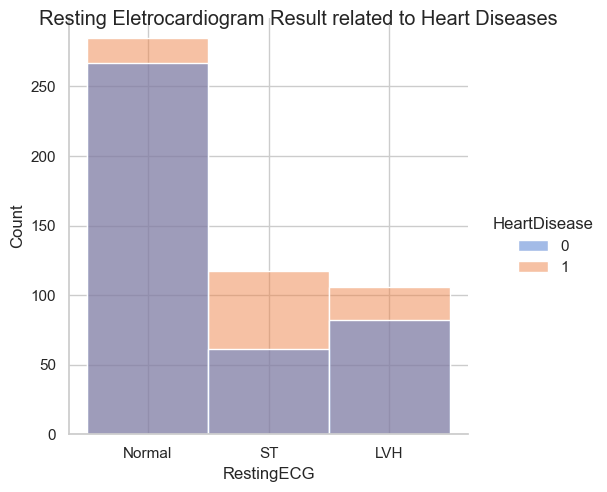

In [18]:
#Resting Eletrocardiogram Results
ax = sns.displot(
    data = dataset,
    x = 'RestingECG',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Resting Eletrocardiogram Result related to Heart Diseases')

In [28]:
#CHECKING THE ACCURACY
df = pd.read_csv('heart.csv')

In [29]:
# Display basic statistics
print(df.describe())

# Display information about the DataFrame
print(df.info())


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 

In [33]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (e.g., fill with mean or drop rows/columns)
df.fillna(df.mean(), inplace=True)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


/var/folders/v4/hbxk55_12_1bf4s096w8hf1c0000gn/T/ipykernel_27556/109209705.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [35]:
# Example: Check unique values in a column(you can check each one)
unique_values = df['MaxHR'].unique()
print(unique_values)

[172 156  98 108 122 170 142 130 120  99 145 140 137 150 166 165 125 160
 164 138 178 112 118 127 114 154 155  87 148 100 168 184 121 153 134  96
 174 175 144  82 135 115 128 116  94 110  92 180 152 124 106 185 139 190
 146 158 132 176 119 188 162 105  90 136 167 129 102 143 103  91 126  93
 131 149 123 182 141  77 109 133 179 113 104  95  72  97 117  86  63 157
  83  60  70 163  67  78  84 111  80 107 161  69  88  73 159 151 181 186
 177 173 169 171 147  71 192 195 194 187 202]


In [47]:
#Check if a column meets a certain condition(you can check each one)
condition_met = df['HeartDisease'] > 0
print(condition_met)

0      False
1       True
2      False
3       True
4      False
       ...  
913     True
914     True
915     True
916     True
917    False
Name: HeartDisease, Length: 918, dtype: bool


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Evaluate accuracy of a classification of each model
y_true = df['HeartDisease']
y_pred = df['Cholesterol']
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.02178649237472767


In [50]:
#interactive graph/I try to see how it looks(fun)
from ipywidgets import interact
@interact
def explore_data(column=df.columns):
    df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.show()


interactive(children=(Dropdown(description='column', options=('Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cho…